In [34]:
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
#IMPLEMENTED FUNCTIONS
from functions import make_matrix, get_tol_matrix, iteration, dis_algo, print_matrix, get_happiness, get_agents, get_r, save_data, run, average

In [35]:
def average(lista):
    return sum(lista)/len(lista)

Define system conditions

In [36]:
N       = 50 # MATRIX SIZE
density = 0.9 # POPULATION DENSITY ON LATICE
f1      = 0.5 # STARTING POPULATION PERCENTAGE FOR RED POPULATION
tmin    = 0.1 # MINIMUM TOLERANCE (BORDER CONDITION ON MAXIMUM R VALUE)
tmax    = 0.9 # MAXIMUM TOLERANCE (BORDER CONDITION ON MINIMUM R VALUE)

In [37]:
output = run(N=N, density=density, f1=f1, measure_r_values=True, measure_happiness=True)

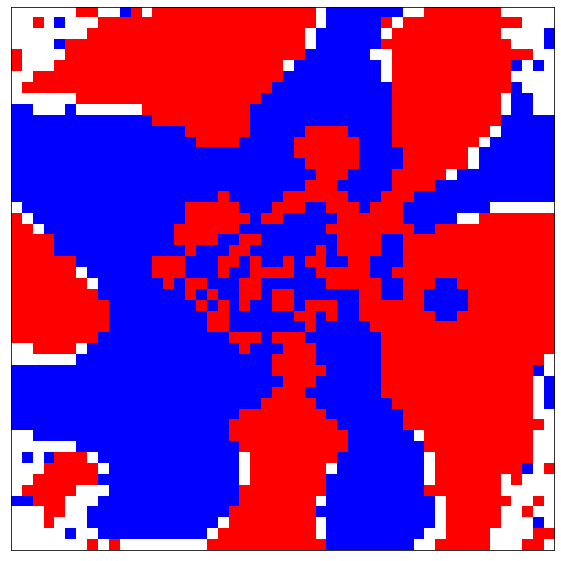

In [38]:
print_matrix(output['matrix'])

# QUANDO NÃO HÁ MINORIA

Skip this

In [103]:
def gauss(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [93]:
#(mu_r, sigma_r) = norm.fit(avg_r_red)
#(mu_b, sigma_b) = norm.fit(avg_r_blu)

In [51]:
#n_r, bins, patch = plt.hist(avg_r_red, 40, color='red' , density=True, alpha=0.4)
#n_b, bins, patch = plt.hist(avg_r_blu, 40, color='blue', density=True, alpha=0.4)

#plt.plot(x, max(n_r)*gauss(x, mu_r, sigma_r), '--', color='red')
#plt.plot(x, max(n_b)*gauss(x, mu_b, sigma_b), '--', color='blue')

In [50]:
#data      = [avg_r_red, avg_r_blu]
#save_data(data, 'TLC_50_50.txt')

# FAZENDO VARIAR O VALOR DE f1 POR ITERAÇÃO

In [48]:
tmax = 0.9
tmin = 0.1

f1s = np.linspace(0.01, 0.99, 99)

In [49]:
avg_r_blu_ = list()
avg_r_red_ = list()

for f1 in f1s:
    print('\n' + str(round(f1, 2)) + '/' + '0.99')
    output = run(N=N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_.append(average(output['red_rs'][-1]))
    avg_r_blu_.append(average(output['blu_rs'][-1]))


0.01/0.99
Finished!
0.02/0.99
Finished!
0.03/0.99
Finished!
0.04/0.99
Finished!
0.05/0.99
Finished!
0.06/0.99
Finished!
0.07/0.99
Finished!
0.08/0.99
Finished!
0.09/0.99
Finished!
0.1/0.99
Finished!
0.11/0.99
Finished!
0.12/0.99
Finished!
0.13/0.99
Finished!
0.14/0.99
Finished!
0.15/0.99
Finished!
0.16/0.99
Finished!
0.17/0.99
Finished!
0.18/0.99
Finished!
0.19/0.99
Finished!
0.2/0.99
Finished!
0.21/0.99
Finished!
0.22/0.99
Finished!
0.23/0.99
Finished!
0.24/0.99
Finished!
0.25/0.99
Finished!
0.26/0.99
Finished!
0.27/0.99
Finished!
0.28/0.99
Finished!
0.29/0.99
Finished!
0.3/0.99
Finished!
0.31/0.99
Finished!
0.32/0.99
Finished!
0.33/0.99
Finished!
0.34/0.99
Finished!
0.35/0.99
Finished!
0.36/0.99
Finished!
0.37/0.99
Finished!
0.38/0.99
Finished!
0.39/0.99
Finished!
0.4/0.99
Finished!
0.41/0.99
Finished!
0.42/0.99
Finished!
0.43/0.99
Finished!
0.44/0.99
Finished!
0.45/0.99
Finished!
0.46/0.99
Finished!
0.47/0.99
Finished!
0.48/0.99
Finished!
0.49/0.99
Finished!
0.5/0.99
Finished!
0.51

(0.4, 1)

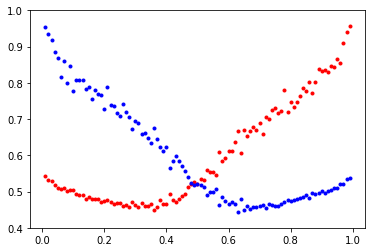

In [58]:
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_red_], '.', color='red')
plt.plot(f1s, [r/(get_r(0, 0, N)) for r in avg_r_blu_], '.', color='blue')

plt.ylim(0.4, 1)

VARIAMOS O INTERVALO DOS VALORES DE T E VEMOS O QUE ACONTECE

In [151]:
tmax = 0.9
tmin = 0.1

f1s = np.linspace(0.01, 0.99, 396)

In [152]:
avg_r_blu_2 = list()
avg_r_red_2 = list()

for f1 in f1s:
    print(str(round(f1, 2)) + '/' + '0.99')
    output = run(N=2*N, density=density, f1=f1, measure_r_values=True, tmax=tmax, tmin=tmin)
    
    avg_r_red_2.append(average(output['red_rs'][-1]))
    avg_r_blu_2.append(average(output['blu_rs'][-1]))

0.01/0.99
0.01/0.99
0.01/0.99
0.02/0.99
0.02/0.99
0.02/0.99
0.02/0.99
0.03/0.99
0.03/0.99
0.03/0.99
0.03/0.99
0.04/0.99
0.04/0.99
0.04/0.99
0.04/0.99
0.05/0.99
0.05/0.99
0.05/0.99
0.05/0.99
0.06/0.99
0.06/0.99
0.06/0.99
0.06/0.99
0.07/0.99
0.07/0.99
0.07/0.99
0.07/0.99
0.08/0.99
0.08/0.99
0.08/0.99
0.08/0.99
0.09/0.99
0.09/0.99
0.09/0.99
0.09/0.99
0.1/0.99!
0.1/0.99!
0.1/0.99!
0.1/0.99!
0.11/0.99
0.11/0.99
0.11/0.99
0.11/0.99
0.12/0.99
0.12/0.99
0.12/0.99
0.12/0.99
0.13/0.99
0.13/0.99
0.13/0.99
0.13/0.99
0.14/0.99
0.14/0.99
0.14/0.99
0.14/0.99
0.15/0.99
0.15/0.99
0.15/0.99
0.15/0.99
0.16/0.99
0.16/0.99
0.16/0.99
0.16/0.99
0.17/0.99
0.17/0.99
0.17/0.99
0.17/0.99
0.18/0.99
0.18/0.99
0.18/0.99
0.18/0.99
0.19/0.99
0.19/0.99
0.19/0.99
0.19/0.99
0.2/0.99!
0.2/0.99!
0.2/0.99!
0.2/0.99!
0.21/0.99
0.21/0.99
0.21/0.99
0.21/0.99
0.22/0.99
0.22/0.99
0.22/0.99
0.22/0.99
0.23/0.99
0.23/0.99
0.23/0.99
0.23/0.99
0.24/0.99
0.24/0.99
0.24/0.99
0.24/0.99
0.25/0.99
0.25/0.99
0.25/0.99
0.25/0.99
0.26/0.99


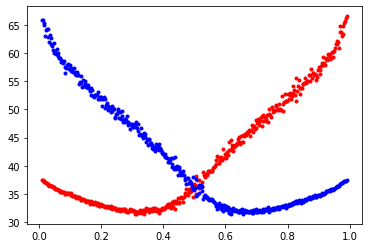

In [153]:
plt.plot(f1s, avg_r_red_2, '.', color='red')
plt.plot(f1s, avg_r_blu_2, '.', color='blue')